# SEP Fit Spectra Tool

<div class="alert alert-block alert-danger">
<font size="6">
⚠️ <b>This is a prelimenary development version! Not intended for productive use!</b> ⚠️
</font> 
</div>

This tool fits energetic particle energy spectra. The fitting is done using Python ODR.
<br>The fit result and a plot showing the data and the fit are automatically saved

### Table of contents:
* [1. Available Models](#1.-Available-models-to-fit-the-spectrum)
* [2. Loading the data file](#2.-Loading-the-data-file)
  - [2.1 Choose $I_{0}$](#2.1-Choose-$I_{0}$)
* [3. Fitting the Spectrum](#3.-Fitting-the-Spectrum)
  - [3.1 Choose a model to fit the spectrum](#3.1-Choose-a-model-to-fit-the-spectrum)
  - [3.2 Choose the input parameters for the fit](#3.2-Choose-the-input-parameters-for-the-fit)
* [Appendix](#Appendix)



In [1]:
import os
import pandas as pd
from fit_spectra.run_spectra_fit import run_the_fit
from fit_spectra.functions_for_spectra_fit import plot_spectrum
from IPython.display import Image

## 1. Available-models-to-fit-the-spectrum
The tool includes the following five models, which can be used to fit the data:
 
<br>Single power-law: $$I(E) = I_0 \left(\frac{E}{E_0} \right)^{\gamma_1} \tag{1}$$
<br>Double power-law: $$I(E) = I_0 \left(\frac{E}{E_0} \right)^{\gamma _1} \left(\frac{E^{\alpha}+E^{\alpha}_{\rm b}}{E^{\alpha} _0+E^{\alpha}_{\rm b}} \right) ^{\frac{\gamma_2 -\gamma_1}{\alpha}} \tag{2}$$ 
<br>Single power-law with exponential cut-off: $$I(E) = I_0 \left(\frac{E}{E_0} \right)^{\gamma _1} \exp(-\left( \frac{E}{E_{\rm c}} \right)^x ) \tag{3}$$
<br>Double power-law with exponential cut-off: $$I(E) = I_0 \left(\frac{E}{E_0} \right)^{\gamma _1}  \left(\frac{E^{\alpha}+E^{\alpha}_{\rm b}}{E^{\alpha} _0+E^{\alpha}_{\rm b}} \right)^{\frac{\gamma_2 -\gamma_1}{\alpha}} \exp({-\left( \frac{E}{E_{\rm c}} \right)^x }) \tag{4}$$
<br>Triple power-law: $$I(E) = I_0 \left(\frac{E}{E_0} \right)^{\gamma _1}  \left(\frac{E^{\alpha}+E^{\alpha}_{\rm bl}}{E^{\alpha} _0+E^{\alpha}_{\rm bl}} \right)^{\frac{\gamma_2 -\gamma_1}{\alpha}} \left(\frac{E^{\beta}+E^{\beta}_{\rm bh}}{E^{\beta} _0+E^{\beta}_{\rm bh}} \right)^{\frac{\gamma_3 -\gamma_2}{\beta}} \tag{5}$$
<br> You can choose to fit either a specific model or a combination of them to the data. If a combination is used, the software will compare the reduced $\chi²$ values of the different models automatically choose the best one based on the smallest reduced $\chi²$ value.
<br>$\textbf{NOTE}$: Even when only one specific model was chosen but not fit could be obtained with that model, the software automatically falls back to a simpler model and chooses that model as the best one. For example, when a double power-law fit can't be obtained, the software may chose a single power-law fit instead.

**Example of what the above functions can look like** [Fedeli et al. (2025)](https://iopscience.iop.org/article/10.1051/0004-6361/202555915)
<br> Just run the following cell

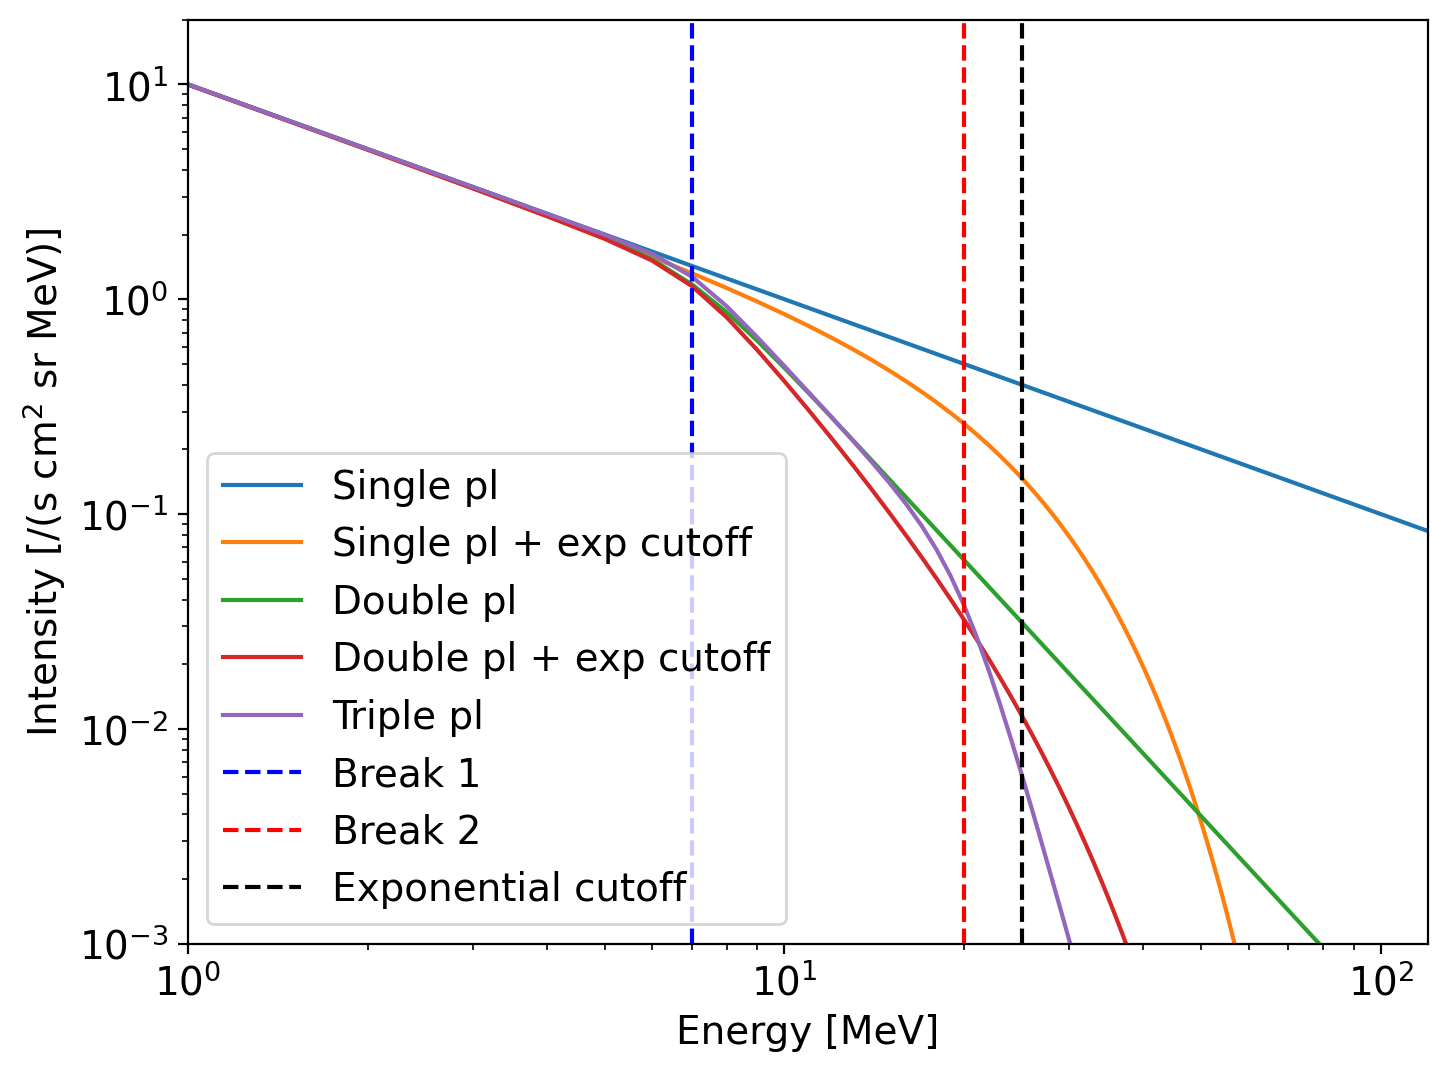

In [2]:
Image(f"{os.getcwd()}{os.sep}fit_spectra{os.sep}function_schematic.png", width=800, height=800)

## 2. Loading the data file

<br> Provide the path to the file. The file can be in either txt or csv format. If the data is in xlsx format use pd.read_excel() instead of pd.read_csv(). The fit output (plot and variables resulting from the fit) will be saved in the same folder as your data file. The name of the output files will be based on the name of the provided file. 
<br> $\textbf{NOTE}$: the file should have the following column names: 'Energy', 'Intensity', 'E_err', 'I_err'
<br> 'Energy' and 'Intensity' are mandatory columns. 'E_err' and 'I_err' can be empty columns or omitted completely in case there are no energy or intensity uncertainties. The file can contain other columns as well, but should have energy and intensity/flux data named as mentioned. 


In [3]:
path = f"{os.getcwd()}{os.sep}output_spectra{os.sep}spectrum_integral_SOLO_EPT_sun_ions.csv"
data = pd.read_csv(path)  # or pd.read_excel() for xlsx data


The following cell displays the first five lines in you data. You can check that the columns are named correctly.

In [4]:
data.head()

,Energy,Intensity,E_err,I_err
0,0.053328,NaN,0.003965,0.000000e+00
1,0.055929,1.679681e+13,0.004110,1.552869e+13
2,0.058856,1.455235e+13,0.003745,1.400378e+13
3,0.061322,1.374413e+13,0.003640,1.316964e+13
4,0.064197,1.195519e+13,0.003545,1.141761e+13


**The following cell shows the spectrum, based on your data, without fit.**

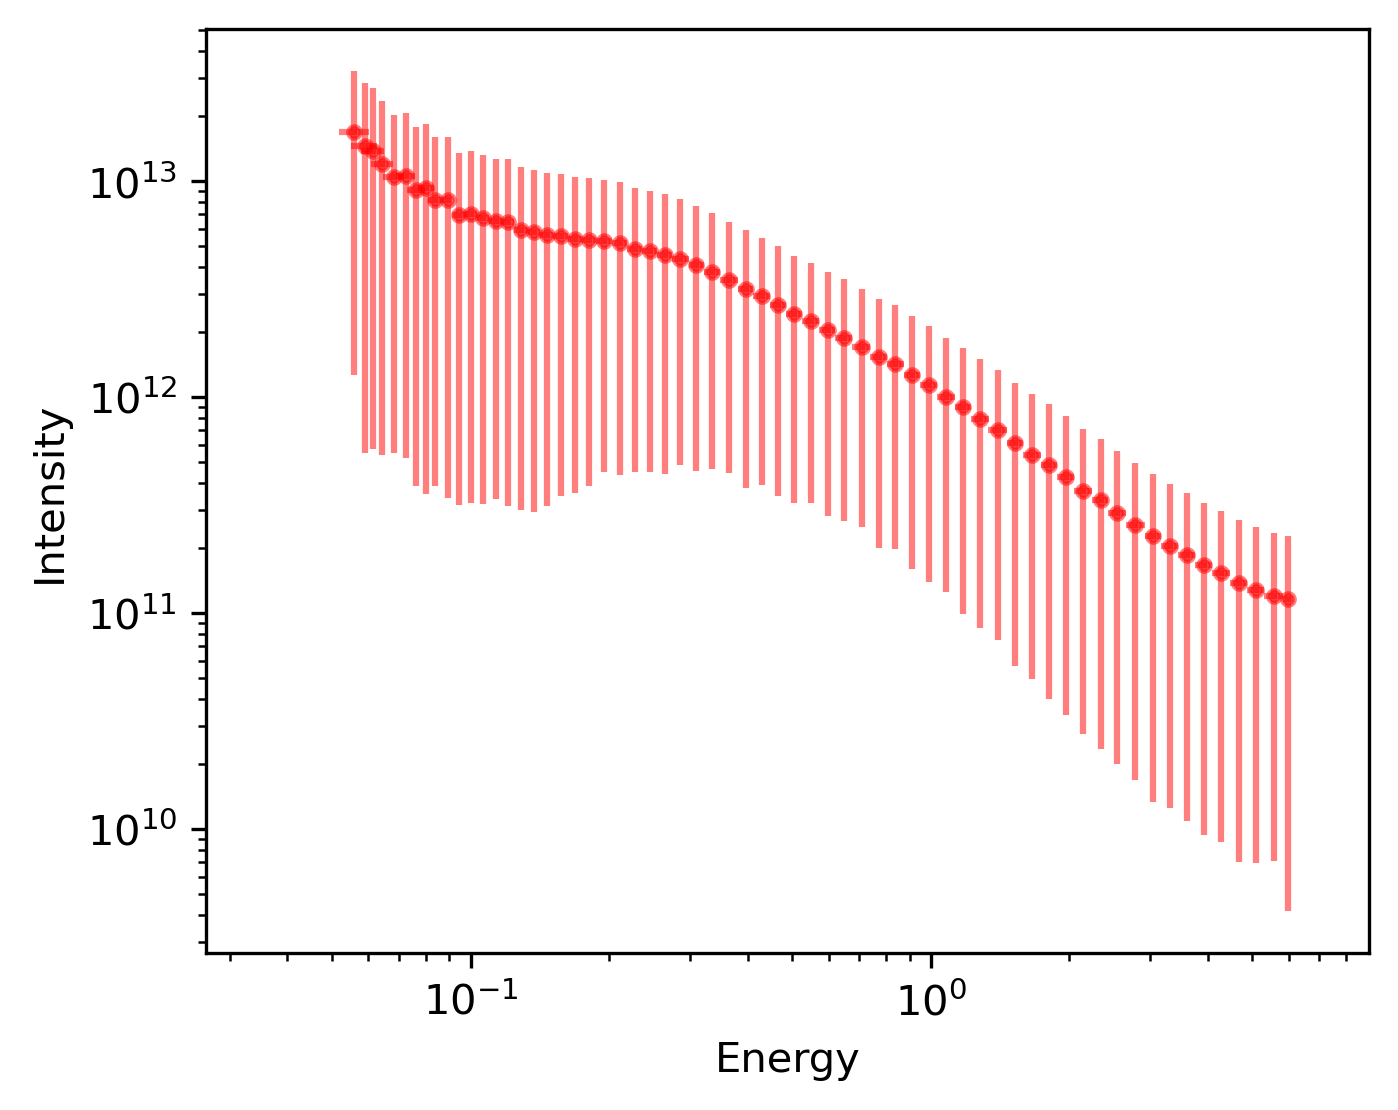

In [5]:
plot_spectrum(data)

### 2.1 Choose $I_{0}$
One of the most important variables for the fit to work is $I_{0}$, which represents the intensity or flux at 100 keV. The above sepctra should help you estimate what $I_{0}$ is for your spectra. **NOTE:** it does not have to be an exact match, but the value should be within a few orders of magnitude from the actual value.

In [6]:
intensity_zero_guess = 1e4

## 3. Fitting the Spectrum

### 3.1 Choose a model to fit the spectrum
You can either fit a specific model or apply a combination of models using the `which_fit` parameter. The input options are:
<br>`single`, `double`, `best_sb`, `cut`, `double_cut`, `best_cb`, `triple`, `best`
<br>For more information see the [Appendix](#Appendix)

In [7]:
which_fit = 'best' # This cell can be moved closer to run_the_fit to make changing it easier

### 3.2 Choose the input parameters for the fit
Starting with reasonable guess values can be important for the fit to converge. If no fit is found, try to optimize the guess values. However, the fit ususally works quite well with a large variety of guesses so you do not necessarily need to change the default values.
<br> Below, you can also specify the enrgy range to fit, exclude channels (see list below for indices corresponding to specific channels) and change the plot title and axis names.
<br> For more information on all the variables consult the [Appendix](#Appendix).


In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.Energy)

0     0.053328
1     0.055929
2     0.058856
3     0.061322
4     0.064197
5     0.068088
6     0.072282
7     0.076269
8     0.080047
9     0.083889
10    0.089144
11    0.094331
12    0.100346
13    0.106454
14    0.113391
15    0.120884
16    0.128896
17    0.137543
18    0.146563
19    0.157006
20    0.168525
21    0.181015
22    0.195442
23    0.210947
24    0.227441
25    0.245484
26    0.264496
27    0.285966
28    0.309581
29    0.335188
30    0.364842
31    0.396039
32    0.429067
33    0.465698
34    0.504823
35    0.548943
36    0.597024
37    0.648579
38    0.707711
39    0.771240
40    0.838692
41    0.911835
42    0.991186
43    1.080733
44    1.176583
45    1.280465
46    1.399421
47    1.527387
48    1.663747
49    1.810412
50    1.968440
51    2.148588
52    2.340770
53    2.546403
54    2.787478
55    3.044092
56    3.313573
57    3.608350
58    3.927056
59    4.286448
60    4.672104
61    5.087562
62    5.567431
63    5.980041
Name: Energy, dtype: float64


In [9]:
gamma_1_guess = -1.9 # gamma 1 -> spectral index before the break (or single pl)
gamma_2_guess = -2.5 # gamma 2 -> spectral index after the first break (for broken pls)
gamma_3_guess = -4.5 # gamma 3 -> spectral index after the second break (for triple pl)
#intensity_zero_guess = 1e4 # peak flux
alpha_guess = 7.16 # sharpness of the first break
beta_guess = 10 #sharpness of the second break
break_energy_low_guess = 0.06 #in MeV
break_energy_high_guess = 0.12 #in MeV
cutoff_energy_guess = 0.12 #in MeV
exponent_guess = 2

e_min =  None # in MeV 
e_max = None # in MeV
exclude_channels = None # list of indices correspong to the channels e.g. [1,3, 24]

use_random = True 
iterations = 100

legend_details = False
plot_title = 'SOLER DATA TEST'
x_label = 'Energy (MeV)'
y_label = 'Intensity\n/(s cm² sr MeV)'
legend_title = '' 

use_filename_as_title = False

save = True

# You can add which_fit = '' here for example

### Fitting the spectrum
**Just run do not change the following cell**

/home/annafed/Documents/GitHub/sep_tools/fit_spectra/my_power_law_fits_odr.py:80: RuntimeWarning: overflow encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/sep_tools/fit_spectra/my_power_law_fits_odr.py:80: RuntimeWarning: invalid value encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/sep_tools/fit_spectra/my_power_law_fits_odr.py:80: RuntimeWarning: overflow encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_

/home/annafed/Documents/GitHub/sep_tools/fit_spectra/my_power_law_fits_odr.py:80: RuntimeWarning: divide by zero encountered in divide
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/sep_tools/fit_spectra/my_power_law_fits_odr.py:44: RuntimeWarning: invalid value encountered in add
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)


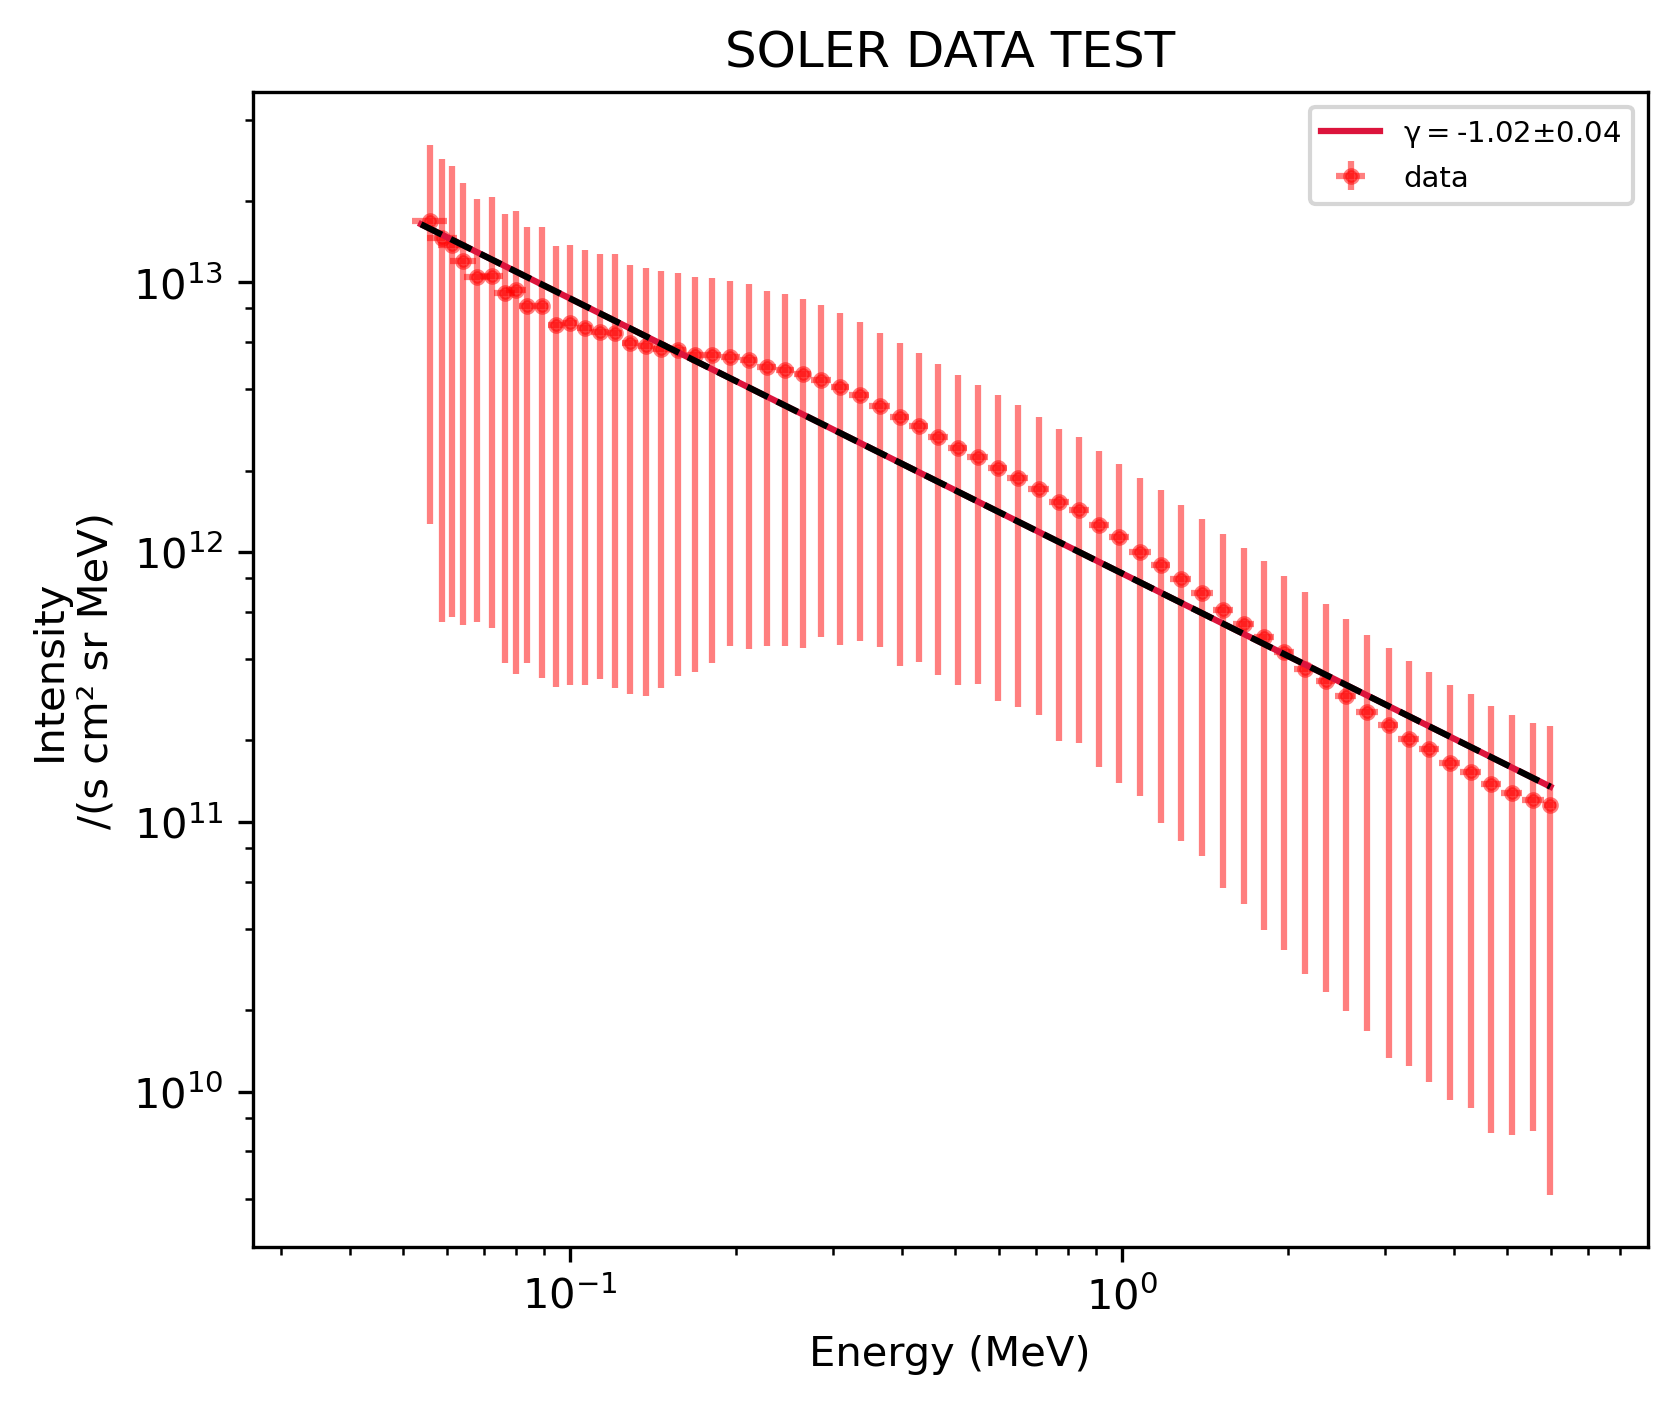

The fit produced the following results:
Final fit type:  single power-law
χ²:   0.06
Intensity at 100 keV : 8709565530214.93 +/- 722771867659.31
γ 1:   -1.02 +/- 0.04
E min [MeV]:   0.05
E max [MeV]:   5.98


In [10]:
run_the_fit(path, data, save, use_filename_as_title, channels_to_exclude = exclude_channels, plot_title = plot_title, x_label = x_label, y_label = y_label, legend_title = legend_title, which_fit = which_fit,  e_min = e_min, e_max = e_max, g1_guess =gamma_1_guess, g2_guess = gamma_2_guess, g3_guess = gamma_3_guess, c1_guess = intensity_zero_guess, alpha_guess = alpha_guess, beta_guess = beta_guess, break_guess_low = break_energy_low_guess, break_guess_high = break_energy_high_guess, cut_guess = cutoff_energy_guess, exponent_guess = exponent_guess, use_random = use_random, iterations = iterations , legend_details = legend_details)

# Appendix

**abbreviations:**
<br> pl: power-law
<br> exp. : exponential

**Choosing a model to fit the spectrum**
You can either fit a specific model or apply a combination of models using the `which_fit` parameter: 
<br>`single`: applies a single power-law fit to the data (Eq. 1)
<br>`double`: applies a broken power-law fit (Eq.2) to the data but ONLY if the break point is within the energy range otherwise a single power-law fit will be used instead 
<br>`best_sb`: automatically chooses the better model out of a single and a broken power-law (Eq. 1-2)
<br>`cut`: applies a single power-law fit with an exponential cut-off (Eq. 3). If the cut-off energy is found to be outside of the spectral energy range a broken or single power-law will be fit instead 
<br>`double_cut`: applies a broken power-law fit with an exponential cutoff (Eq. 4). If the cutoff energy is found to be outside of the spectral energy range a broken or single power-law will be fit instead
<br>`best_cb`: automatically chooses the better model out of a broken power-law and a single power-law with exponential cutoff. If the break and cutoff points are outside of the spectral energy range a single power-law will be fit instead (Eq. 2-3)
<br>`triple`: applies a triple power-law (Eq. 5). If no working fit is found, will try to fit the next best option between the available models. 
<br> `best`: automatically chooses the best fit out of all five models

**Guess values:**
<br>Starting with reasonable guess values can be important for the fit to converge. If no fit is found, try to optimize the guess values. The most important one is `intensity_zero_guess`, which descibes the intensity value at an energy of 0.1 MeV.

<br> `gamma_1_guess`:  spectral index before the break (or single pl). Defaults to -1.9
<br> `gamma_2_guess`:  spectral index after the first spectral break (for broken pl, broken pl + exp. cut-off, triple pl)  Defaults to -2.5
<br> `gamma_3_guess`:  spectral index after the second break (for triple pl)  Defaults to -4.
<br> `intensity_zero_guess`:  Intensity value at 100 keV.  Defaults to 1000. $\textbf{NOTE}$: try to estimate the intensity at 100 keV. If the fit fails, it often depends on this input parameter. 
<br> `alpha_guess` sharpness of the first break.  The values usually range between 10-100. Smaller values represent sharper breaks, while larger values indicate a smoother transition. The values can be both positive and negative. Negative values indicate an upturn, or spectral hardening after the break. Defaults to 10.
<br> `beta_guess` sharpness of the second break. See explanation for `alpha_guess`.  Defaults to 10.
<br> `break_energy_low_guess` guess value for the first spectral break. Input in MeV.  Defaults to 0.6.
<br> `break_energy_high_guess` guess value for the second spectral break. Input in MeV.  Defaults to 1.2.
<br> `cutoff_energy_guess` guess value for the exponential cut-off energy. Input in MeV.  Defaults to 1.2.
<br> `exponent_guess` guess value for the exponent of the cut-off ($x$ in Eq. 3-4). Defaults to 2.

**Energy range and datapoints considered in the fit:**

You can restrict the overall energy range, in which the fit will be applied using `e_min`and `e_max`. If `None`, the full available energy range will be fit.
<br> `e_min`: Lower limit for the energy range to fit. Input in MeV, defaults to `None`. 
<br> `e_max`: Upper limit for the energy range to fit. Input in MeV, defaults to `None`.
<br> `exclude_channels`: list of indices corresponding to the energy channels you wish to exclude from the fit. If `None` all energy channels will be used in the fit. To see the indices corresponding to the energy channels run data.Energy in any cell. The excluded energy channels are marked in gray in the plot.

**Random and iterations**
<br> This tool gives you the possibility to not only fit the data once using the chosen guess values, but also re-fit the data an `iterations`number of times. This means that the guess values serve as a guide to choose random values (close to the guess values) to fit the data and compare the resulting fits to maximize the chances of finding the best fit possible to the data. 
<br> `use_random` if `False` the fit will only be made once with the guess values, the input for `iterations` will be ignored. If `True`, random values will be selected for each parameter of the fit (the values are based on the input guess values) and the fit will be repeated an `iterations` number of times.
<br> `iterations` is the number of times the fit is retried. For each iteration a new set of guess values (based on the input guess values) will be randomly selected and fit again to the data. The resulting fits will be compared and the best one will be chosen as output. The larger the number of iterations, the longer the fit will take.
<br> $\textbf{NOTE:}$ iterations and random are inputs that affect the number of times the $\chi²$ values are checked and compared. The fitting itself is done with Python ODR, which also has its own iterations to find a convergence for the fit. The ODR iterations are set internally and `iterations`does not affect this.

**Other inputs**
<br> `legend_details` if `False`, only the spectral indices, breaks and cutoff values are included in the legend. If `True` the type of fit, reduced $\chi²$ and $I_{0}$ will also be included. 
<br> `plot_title` title of the plot. Will also be added to the name of the files.
<br> `x_label` label for the x axis
<br> `y_label` label for the y axis
<br> `legend_title`title of the legend
<br> `use_filename_as_title` if `True` the file name of the input data will be used also to name the output file and plot. If `False` only the title and type of fit will be used.
<br> `save` if `True` the plot with the fit will be saved automatically.